In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Problem 1: Geometric Brownian Motion

$$ dS_t = \mu S_tdt + \sigma S_t dW_t,  \\ S_0 = s_0$$

$$ S_t = S_0 \exp [(\mu - \sigma^2 /2)t + \sigma W_t] $$

In [47]:
n = 3650
mu = 0.06
sigma = 0.2
M = 10.0
s0 = 100.0

def exact_simulation(s0, mu, sigma, n):
    dt = 1.0/365.0 # frequency = delta = T/n where T = 1 year and n = 365 days
    dz = np.random.randn(n)*np.sqrt(dt)
    S = s0 * np.exp(np.cumsum((mu-(sigma**2)/2)*dt + sigma*dz))
    return S

In [48]:
# Alternative way from Francesco 
def gen_paths(S0, mu, sigma):
    dt=1.0/365.0
    paths = np.zeros(len(index))
    paths[0] = S0
    for t in range(1, len(index)):
        rand = np.random.standard_normal(1)
        paths[t] = paths[t - 1] * np.exp((mu- 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths, dt

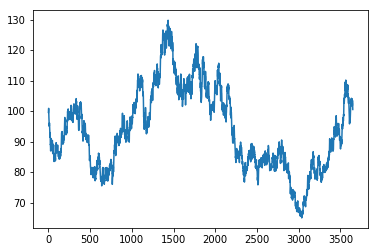

In [49]:
plt.plot(exact_simulation(s0, mu, sigma, n))
plt.show()

In [50]:
# daily continuously compounded returns: r_t = log(1 + R_t) 
prices = exact_simulation(s0, mu, sigma, n)
prices_lagged = np.diff(prices)
R_t = prices_lagged/prices[:-1]
r_t = np.log(1 + R_t)

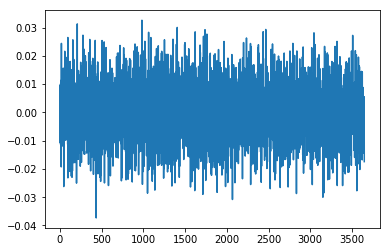

In [51]:
plt.plot(r_t)

In [52]:
def compute_annual_mean_std(log_ret, n, dt):
    annual_mean = np.mean(log_ret)/dt
    annual_std = np.std(log_ret)/np.sqrt(dt)
    return annual_mean, annual_std

In [53]:
dt = 1.0/365.0
annualised_mean, annualised_std = compute_annual_mean_std(r_t, n, dt)
print(f"Annualised mean of daily returns: {annualised_mean} \n")
print(f"Annualised std of daily returns: {annualised_std}")

Annualised mean of daily returns: 6.855560769350806e-05 

Annualised std of daily returns: 0.19554746171054926


### Problem 2

There are 25202 observations


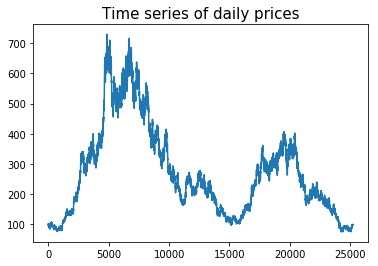

In [54]:
index = pd.period_range(start="01-01-1950", end="31-12-2018", freq="D")
simulated_ts = pd.DataFrame(exact_simulation(s0, mu, sigma, len(index)), index, columns=["price"])
plt.figure()
plt.plot(list(simulated_ts.price))
plt.title("Time series of daily prices", size=15)
print(f"There are {len(simulated_ts)} observations")

Text(0.5,1,'Time series of average monthly prices')

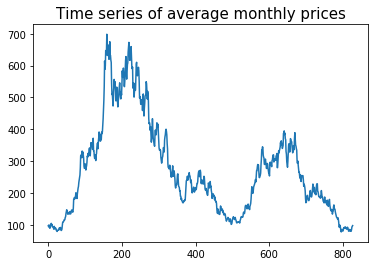

In [55]:
plt.figure()
plt.plot(list(simulated_ts.price.resample("M").mean()))
plt.title("Time series of average monthly prices", size=15)

### Problem 3: Simulated Dataset

In [56]:
def compute_log_ret(series):
    normal_ret = np.diff(series)/series[:-1] 
    return np.log(1 + normal_ret)

In [57]:
def summarise_ts(freq_dict: dict, extra_tit=""): # function takes a dict {name of series: (series, dt)}
    df = pd.DataFrame() # stocking all summary information in to this dataframe
    for tit,freq in freq_dict.items():
        n = len(freq)     
        
        #b)
        for i,v in freq[0].describe().iteritems():
            df.at[i, tit] = v
        
        #c)            
        annual_mean, annual_std = compute_annual_mean_std(freq[0], n, freq[1])                
        df.at["annual_mean", tit] = annual_mean
        df.at["annual_std", tit] = annual_std

        #d) annualised means and stds of rolling-ed log returns
        rolling_log_ret_mean = freq[0].rolling(freq[1]).mean()*freq[1]
        rolling_log_ret_std = freq[0].rolling(freq[1]).std()*np.sqrt(freq[1])
        
        rolling_log_ret_mean.plot(label=tit, ax=ax1)
        ax1.set_title(f"Time series of Annualised Mean {extra_tit} (rolling 1 year)", size=15)
        ax1.legend(loc="best")

        rolling_log_ret_std.plot(label=tit, ax=ax2)
        ax2.set_title(f"Time series of Annualised Std {extra_tit} (rolling 1 year)", size=15)
        ax2.legend(loc="best")

    print(f"Summary table for {tit} {extra_tit}:\n")
    print(df)
    return df

Summary table for monthly returns :

             daily returns  weekly returns  monthly returns
count         2.520100e+04    3.601000e+03       827.000000
mean         -9.683203e-07   -6.776629e-06        -0.000082
std           1.044073e-02    2.762787e-02         0.056895
min          -4.257370e-02   -9.283405e-02        -0.163855
25%          -7.026275e-03   -1.815428e-02        -0.038767
50%          -9.667682e-07    4.365855e-04        -0.001268
75%           6.999222e-03    1.867882e-02         0.038493
max           4.311024e-02    1.031697e-01         0.176353
annual_mean  -2.652932e-09   -1.303198e-07        -0.000007
annual_std    5.464819e-04    3.830764e-03         0.016414


<Figure size 432x288 with 0 Axes>

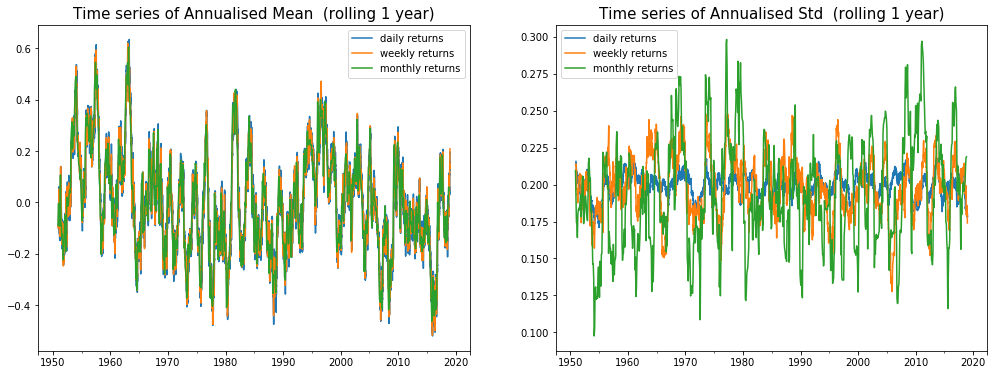

In [58]:
#a)
log_daily_ret = compute_log_ret(simulated_ts.price)
log_weekly_ret = compute_log_ret(simulated_ts.price.resample("W").first()) # log of weekly returns
log_monthly_ret = compute_log_ret(simulated_ts.price.resample("M").first()) # log of montly returns

log_ts = {"daily returns": (log_daily_ret, 365), 
         "weekly returns": (log_weekly_ret, 52), 
         "monthly returns": (log_monthly_ret, 12)}

plt.figure()
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(17,6))
summarise_ts(log_ts)
plt.show()

In [60]:
D_avg = simulated_ts # conforming with Francesco's naming choice

#)f
#daily 
theretical_mu=0.06
theretical_var=0.04 #here we are working over groups of lenght 1 year so T=1
logret = np.log(D_avg/D_avg.shift(1)) #daily returns 
#Estimated  Moments of daily Sample Mean  
Annual_bins= logret.resample('A') #annual regroup 
Annual_bins = Annual_bins.mean()*365 #sum of daily returns per year
day_est_mean = Annual_bins.mean() #annualized mean
#Estimated  Moments of daily Sample variance  
dailysqrt = logret **2
t_var_sigma_d=2*theretical_var**2/365+4*theretical_mu**2*theretical_var/365**2 #Merton (1980)
t_mu_sigma_d= theretical_var+dailysqrt.mean()
d_var = dailysqrt.resample('A')
var_d= d_var.mean()*365

#monthly
M_avg = D_avg.resample('M',convention = 'start').first()
m_logret = np.log(M_avg/M_avg.shift(1))#monthly returns
mAnnual_bins= m_logret.resample('A')#annual regroup 
mAnnual_bins = mAnnual_bins.mean()*12 #sum of montly returns per year
month_est_mean = mAnnual_bins.mean()#annualized mean
monthsqrt = m_logret **2
t_var_sigma_m=2*theretical_var**2/12+4*theretical_mu**2*theretical_var/12**2 #Merton (1980)
t_mu_sigma_m= theretical_var+monthsqrt.mean()
m_var = monthsqrt.resample('A')
var_m= m_var.mean()*12

print("Theoretical Moments of daily Sample Mean       : mean : 0.0600   variance: 0.0400")
print("Estimated  Moments of daily Sample Mean        : mean : %1.5f   variance: %1.5f"%( day_est_mean,Annual_bins.var()))
print("Theoretical Moments of  daily Sample variance  : mean : %1.5f   variance: %1.10f"%( t_mu_sigma_d,t_var_sigma_d))
print("estimated Moments of  daily Sample variance    : mean : %1.5f   variance: %1.10f"%( var_d.mean(),var_d.var()))

print("Theoretical Moments of monthly Sample Mean         : mean : 0.0600    variance: 0.0400")
print("Estimated  Moments of monthly Sample Mean          : mean : %1.5f   variance: %1.5f"%( month_est_mean,mAnnual_bins.var()))

print("Theoretical Moments of  monthly Sample variance    : mean : %1.5f   variance: %1.10f"%( t_mu_sigma_m,t_var_sigma_m))
print("estimated Moments of  monthly Sample variance      : mean : %1.5f   variance: %1.10f"%( var_m.mean(),var_m.var()))

Theoretical Moments of daily Sample Mean       : mean : 0.0600   variance: 0.0400
Estimated  Moments of daily Sample Mean        : mean : -0.00035   variance: 0.03742
Theoretical Moments of  daily Sample variance  : mean : 0.04011   variance: 0.0000087714
estimated Moments of  daily Sample variance    : mean : 0.03979   variance: 0.0000102096
Theoretical Moments of monthly Sample Mean         : mean : 0.0600    variance: 0.0400
Estimated  Moments of monthly Sample Mean          : mean : -0.00097   variance: 0.03700
Theoretical Moments of  monthly Sample variance    : mean : 0.04323   variance: 0.0002706667
estimated Moments of  monthly Sample variance      : mean : 0.03879   variance: 0.0001619833


### Problem 4: WRDS dataset

In [ ]:
import wrds
# db = wrds.Connection(wrds_username='hienle')
# db.create_pgpass_file()

In [113]:
# Download daily stock returns 2 for the period starting on January 1 st , 2000 and ending
# on December 12 st , 2018 of the following companies: Apple, Goldman Sachs, Microsoft,
# Procter and Gamble, and General Electric.

companies = {"aapl": 7, "gs": 35048, "msft": 8048, "pg": 21446, "ge": 20792}
ind = pd.date_range(start="01-01-2001", end="31-12-2018", freq="D")
df = pd.DataFrame(index=ind)

In [114]:
df.index

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=6574, freq='D')

In [115]:
# IMPORTANT NOTE: the data obtained contains DAILY RETURNS, not daily closing prices.

# for key,value in companies.items():
#     rets = db.raw_sql(f"select date, ret from crsp.dsf where permco in ({value}) \
#                       and date>='2001-01-01' and date<='2018-12-31'").set_index("date").rename(columns={"ret":key})
    
#     df = pd.merge(df, rets, left_index=True, right_index=True)
    
# df.to_csv("as1_ex4_data.csv")

In [2]:
wrds_df = pd.read_csv("as1_ex4_data.csv", index_col=0)
wrds_df.index = pd.to_datetime(wrds_df.index)

In [17]:
def compound_returns(l):
    l = [i + 1 for i in l]
    return np.prod(l) - 1

test = wrds_df["aapl"]
test.resample("W").apply(compound_returns) #testing

2001-01-07    0.100840
2001-01-14    0.049618
2001-01-21    0.134545
2001-01-28    0.003205
2001-02-04    0.054313
2001-02-11   -0.072727
2001-02-18   -0.006536
2001-02-25   -0.009868
2001-03-04    0.023256
2001-03-11    0.051948
2001-03-18   -0.030864
2001-03-25    0.171975
2001-04-01   -0.040435
2001-04-08   -0.067059
2001-04-15    0.088878
2001-04-22    0.116860
2001-04-29    0.046326
2001-05-06   -0.017176
2001-05-13   -0.112621
2001-05-20    0.029759
2001-05-27   -0.032724
2001-06-03   -0.082162
2001-06-10    0.020584
2001-06-17   -0.041276
2001-06-24    0.089041
2001-07-01    0.044474
2001-07-08   -0.052473
2001-07-15    0.128007
2001-07-22   -0.195976
2001-07-29   -0.051051
                ...   
2018-06-17   -0.014919
2018-06-24   -0.020758
2018-07-01    0.001027
2018-07-08    0.015450
2018-07-15    0.017875
2018-07-22    0.000575
2018-07-29   -0.002403
2018-08-05    0.089067
2018-08-12    0.001298
2018-08-19    0.048427
2018-08-26   -0.006526
2018-09-02    0.053063
2018-09-09 

Summary table for monthly returns of AAPL:

             daily returns  weekly returns  monthly returns
count          4527.000000      940.000000       216.000000
mean              0.001132        0.005452         0.023725
std               0.023080        0.049103         0.105469
min              -0.197470       -0.278471        -0.399818
25%              -0.010026       -0.022686        -0.033579
50%               0.000860        0.007634         0.028053
75%               0.012450        0.034530         0.092115
max               0.130194        0.236207         0.374168
annual_mean       0.000003        0.000105         0.001977
annual_std        0.001208        0.006806         0.030376


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

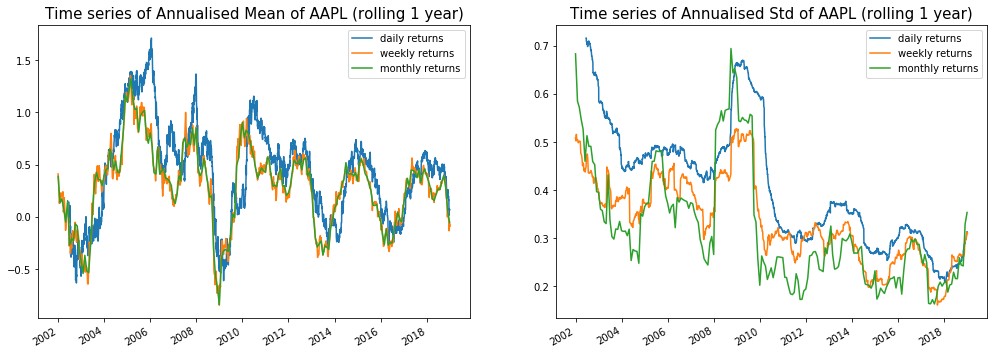

Summary table for monthly returns of GS:

             daily returns  weekly returns  monthly returns
count         4.527000e+03      940.000000       216.000000
mean          1.414752e-04        0.000681         0.002965
std           2.229519e-02        0.047153         0.084343
min          -2.102226e-01       -0.365644        -0.321603
25%          -9.902862e-03       -0.022888        -0.052593
50%           2.436684e-04        0.003330         0.013279
75%           1.044967e-02        0.025124         0.054614
max           2.348177e-01        0.393197         0.210329
annual_mean   3.876033e-07        0.000013         0.000247
annual_std    1.166855e-03        0.006535         0.024291


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

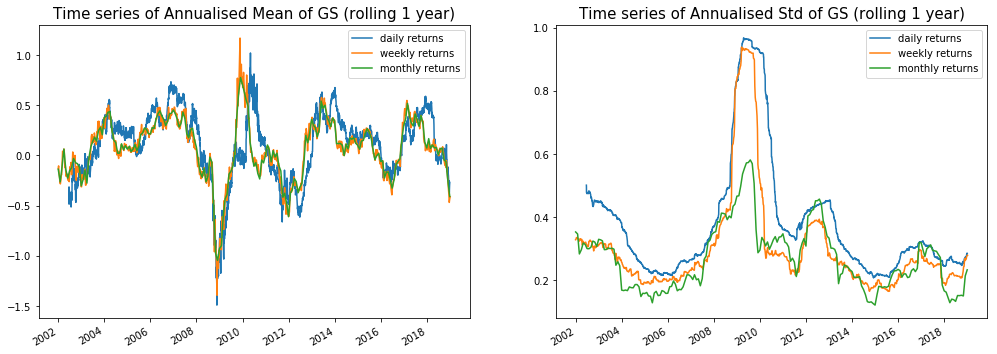

Summary table for monthly returns of MSFT:

             daily returns  weekly returns  monthly returns
count          4527.000000      940.000000       216.000000
mean              0.000435        0.002094         0.009112
std               0.017863        0.036064         0.072791
min              -0.124578       -0.202276        -0.178358
25%              -0.007842       -0.016321        -0.037444
50%               0.000271        0.001697         0.016883
75%               0.008638        0.020865         0.051661
max               0.170626        0.149357         0.342015
annual_mean       0.000001        0.000040         0.000759
annual_std        0.000935        0.004999         0.020964


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

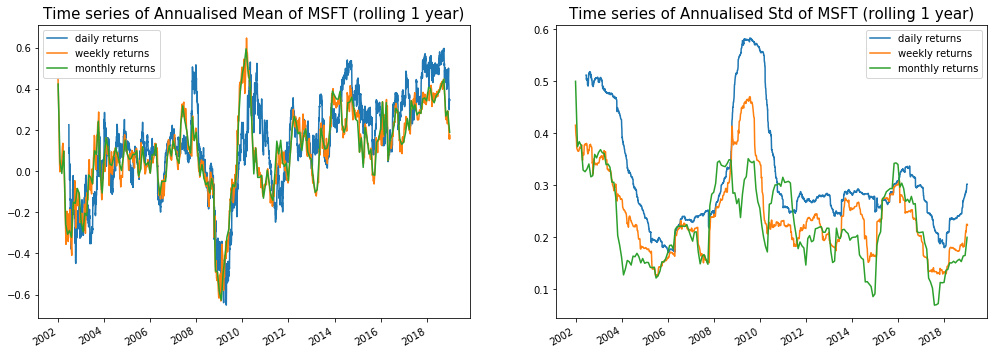

Summary table for monthly returns of PG:

             daily returns  weekly returns  monthly returns
count         4.527000e+03      940.000000       216.000000
mean          2.965820e-04        0.001428         0.006216
std           1.127240e-02        0.023720         0.042587
min          -8.316066e-02       -0.175977        -0.123464
25%          -4.988173e-03       -0.010220        -0.020471
50%           2.995303e-04        0.002072         0.008575
75%           5.702935e-03        0.014303         0.032063
max           9.725736e-02        0.122933         0.112685
annual_mean   8.125534e-07        0.000027         0.000518
annual_std    5.899594e-04        0.003288         0.012265


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

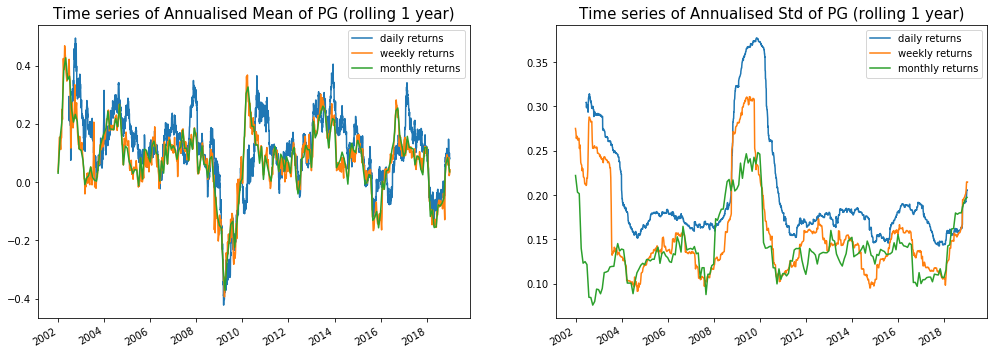

Summary table for monthly returns of GE:

             daily returns  weekly returns  monthly returns
count         4.527000e+03      940.000000       216.000000
mean         -2.822496e-04       -0.001359        -0.005915
std           1.917471e-02        0.041041         0.078448
min          -1.368411e-01       -0.228878        -0.324090
25%          -8.102560e-03       -0.018510        -0.045241
50%           0.000000e+00       -0.000710        -0.004322
75%           7.907814e-03        0.018150         0.039808
max           1.798444e-01        0.309399         0.224132
annual_mean  -7.732867e-07       -0.000026        -0.000493
annual_std    1.003539e-03        0.005688         0.022593


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

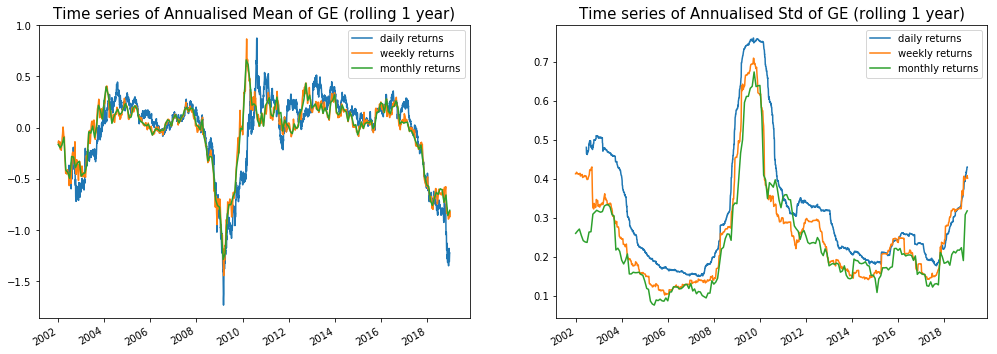

In [46]:
for company in wrds_df.columns:
    plt.figure()
    rets = wrds_df[company]
    log_daily_ret = np.log(1 + rets) 
    log_weekly_ret = np.log(1 + rets.resample("W").apply(compound_returns)) # compounding returns to get a number at low frequency
    log_monthly_ret = np.log(1 + rets.resample("M").apply(compound_returns)) 
 
    ts = {"daily returns": (log_daily_ret, 365), 
         "weekly returns": (log_weekly_ret, 52), 
         "monthly returns": (log_monthly_ret, 12)}
    plt.figure()
    _, (ax1, ax2) = plt.subplots(ncols=2, figsize=(17,6))
    summarise_ts(ts, extra_tit=f"of {company.upper()}")
    plt.show()